In [1]:
def hex_to_rgb(hex_code):
    hex_code = hex_code.strip("#")

    rgb_values = []
    for i in range(0, 6, 2):
        value = int(hex_code[i : i + 2], 16)
        rgb_values.append(value)

    return tuple(rgb_values)

In [2]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.style.use('dark_background')

In [3]:
# read base file with province ids and geometries
gdf = gpd.read_file('eu4base.geojson')
gdf.loc[:, 'id'] = gdf.id.astype(int)

# read file with all province data
df = pd.read_csv("provinces_data.csv")

# merge data
gdf = gdf.merge(df, on="id", how="left")
gdf = gdf.set_index('id')

# load player tags and colours
with open('tags_colours.json', 'r') as f:
    tags_colours = json.load(f)

In [4]:
years = df.year.unique()
years = sorted(years, reverse=True)
years

[1588, 1557, 1533, 1504, 1470, 1444]

In [5]:
# reformations of tags to include everything
reformations = {
    "SCA": ["SCA", "NOR"],
    "SER": ["SER"],
    "AKK": ["AKK"],
    "POR": ["POR"],
    "ADU": ["ADU", "MOR", "TLC"],
    "RMN": ["MOL", "RMN"],
    "NED": ["HOL", "NED"],
    "ITA": ["MLO", "ITA"],
    "GLH": ["GLH", "GOL"],
}

## Plot all players

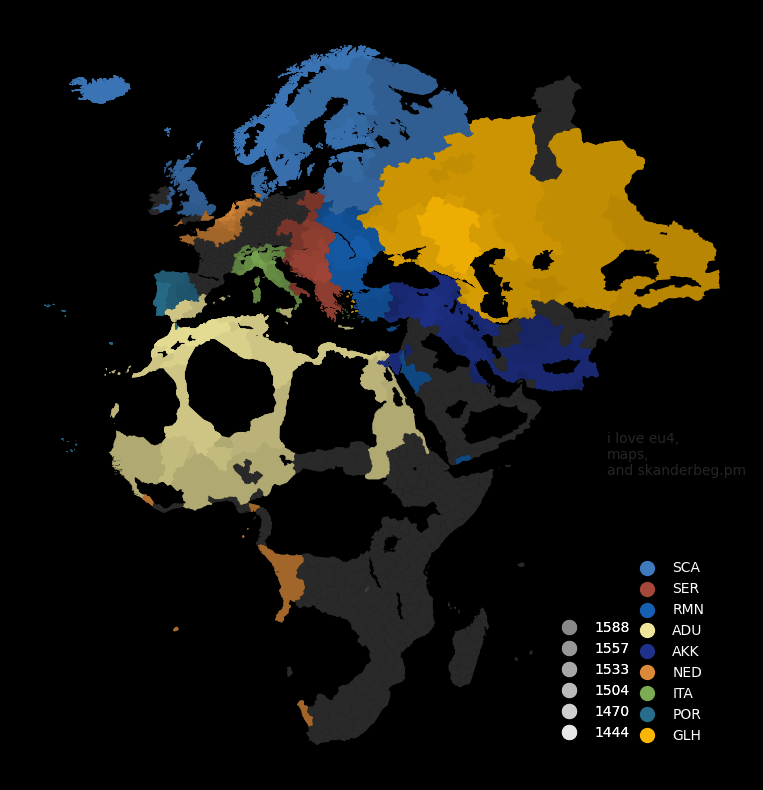

In [6]:
fig, ax = plt.subplots(figsize=(9, 8))
ax.set_axis_off()

# background
ax = gdf[
    (
        gdf.superregion.isin(
            [
                "Western Europe",
                "Eastern Europe",
                "Northern Africa",
                "Southern Africa",
                "Mediterranean Sea",
                "Levant",
                "Persia",
            ]
        )
    )
    & (gdf.terrain == "Land")
].plot(ax=ax, aspect=1, color="#5A5A5A", alpha=0.1)

# ploting tags
for tag in tags_colours:
    year_colours = {}
    for i, year in enumerate(years):
        color = hex_to_rgb(tags_colours[tag])
        cc = [(c * 0.95**(len(years)-i)) / 255 for c in color]
        year_colours[year] = cc
        gpd.GeoSeries(gdf[(gdf.tag.isin(reformations[tag])) & (gdf.year == year) & (gdf.continent.isin(['Europe', 'Africa', 'Asia']))].unary_union).plot(
            ax=ax, aspect=1, color=cc)


# legend - tags
custom_points = [
    Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color)
    for color in tags_colours.values()
]
leg_points = ax.legend(
    custom_points,
    tags_colours.keys(),
    # loc="lower right",
    # ncol=5,
    bbox_to_anchor=(0.95, 0.3),
    framealpha=0
)

ax.add_artist(leg_points)

# legend - years
y_c = {
    year: c
    for year, c in zip(
        years,
        [
            (
                1 * 0.9 ** (len(years) - k),
                1 * 0.9 ** (len(years) - k),
                1 * 0.9 ** (len(years) - k),
            )
            for k in range(len(years))
        ],
    )
}

custom_points = [
    Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color)
    for color in y_c.values()
]
leg_points = ax.legend(
    custom_points, y_c.keys(), ncol=1, bbox_to_anchor=(0.85, 0.2225), framealpha=0
)
ax.add_artist(leg_points)

# possibly change background to map like
# img = plt.imread("charts/bg.jpg")
# x0, x1 = ax.get_xlim()
# y0, y1 = ax.get_ylim()
# ax.imshow(img, extent=[x0, x1, y0, y1], aspect="auto", zorder=-1)


# plt.title("Players' expansion")
fig.text(0.75, 0.4, "i love eu4,\nmaps,\nand skanderbeg.pm", alpha=0.15)
fig.tight_layout()
fig.savefig('charts/Expansion1.png', dpi=700)
plt.show()

## Plot one player

In [7]:
gdf.region.unique()

array(['North East Pacific', 'South East Pacific', None, 'Oceania',
       'Cascadia', 'American East Coast', 'Pacific South America',
       'Atlantic South America', 'Canada', 'North Atlantic',
       'South Atlantic', 'Western Indian Ocean', 'South Indian Ocean',
       'South West Pacific', 'North West Pacific', 'Hudson Bay',
       'La Plata', 'Scandinavia', 'South Africa', 'Ural', 'West Siberia',
       'East Siberia', 'Australia', 'Congo', 'Russia', 'East China Sea',
       'Upper Peru', 'Caribbean Sea', 'Britain', 'Baltic Sea',
       'Central Africa', 'East Africa', 'Eastern Indian Ocean', 'Japan',
       'Manchuria', 'Moluccas', 'California', 'Great Plains',
       'Great Lakes', 'Brazil', 'West African Sea', 'Maghreb',
       'Low Countries', 'North Germany', 'Malaya', 'Mongolia',
       'South China Sea', 'Mexico', 'Central America', 'Peru',
       'Northeast', 'Guinea', 'Iberia', 'France', 'Horn of Africa',
       'Arabian Sea', 'Indonesia', 'South China', 'Rio Grande',
  

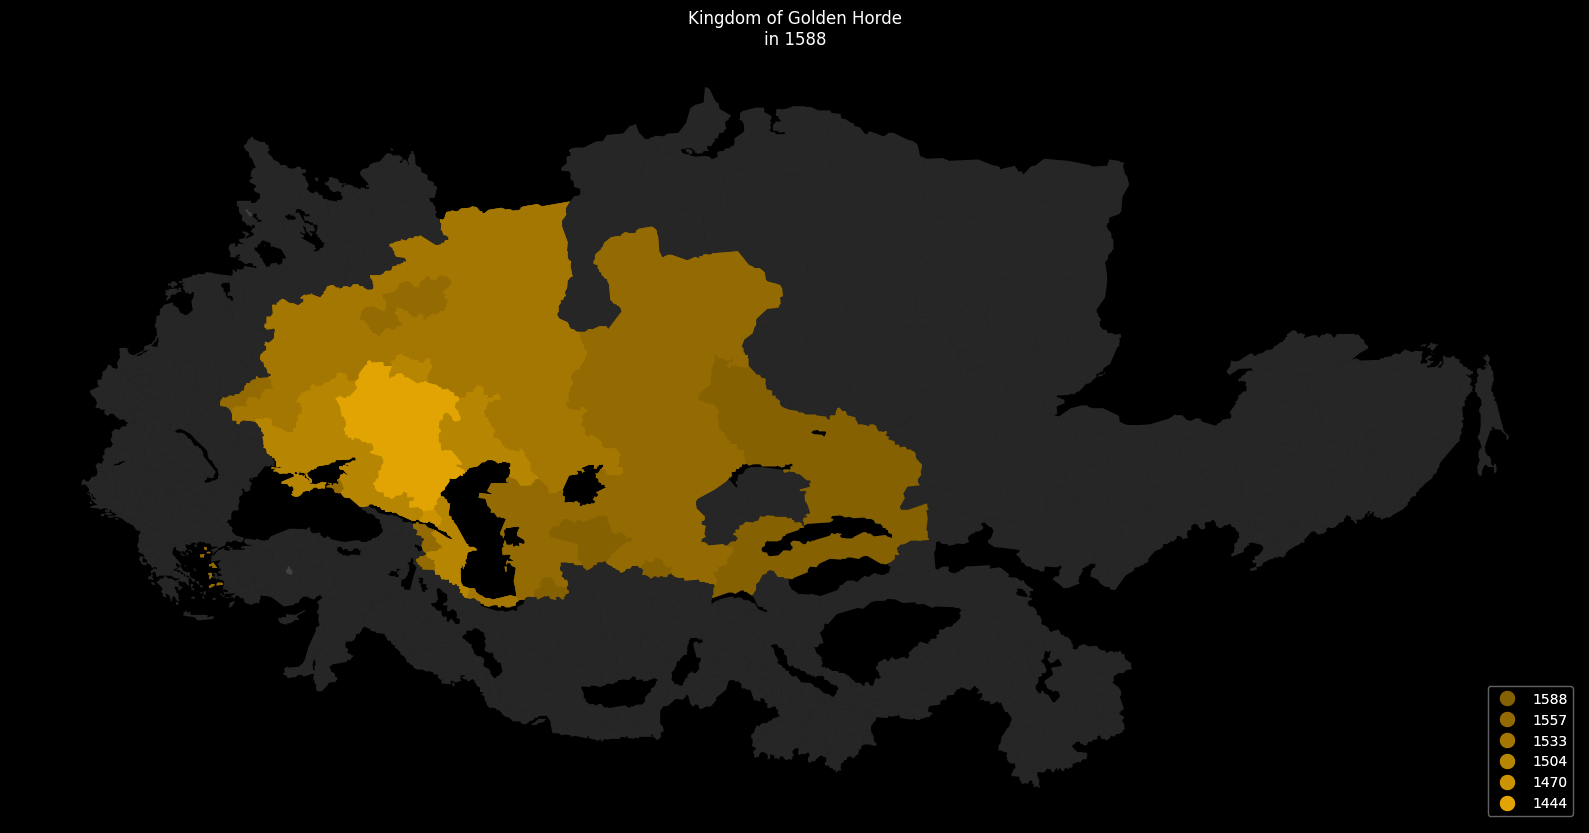

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_axis_off()
main_tag = 'GLH'
mx_year = max(years)

# background
ax = gdf[
    (gdf.year == year)
    & (
        gdf.region.isin(
            [
                "Ural",
                "West Siberia",
                "Russia",
                "Manchuria",
                "Mongolia",
                "Baltic",
                "Central Asia",
                "Ruthenia",
                "Poland",
                "Pontic Steppe",
                "Persia",
                "Khorasan",
                "Caucasia",
                "Mashriq",
                "Tibet",
                "Xinan",
                "Balkans",
                "Hindustan",
                "Carpathia",
                "Anatolia",
            ]
        )
    )
    & (gdf.terrain == "Land")
].plot(ax=ax, aspect=1, color="grey", alpha=0.3)

# plot one tag
year_colours = {}
for i, year in enumerate(years):
    color = hex_to_rgb(tags_colours[main_tag])
    cc = [(c * 0.9**(len(years)-i)) / 255 for c in color]
    year_colours[year] = cc
    gpd.GeoSeries(
        gdf[
            (gdf.tag.isin(reformations[main_tag]))
            & (gdf.year == year)
        ].unary_union
    ).plot(ax=ax, aspect=1, color=cc)


# boundary
# gpd.GeoSeries(
#     gdf[(gdf.tag == main_tag) & (gdf.year == mx_year)].unary_union
# ).boundary.plot(ax=ax, color=tags_colours[main_tag], linewidth=0.5)


# legend - years
custom_points = [
    Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color)
    for color in year_colours.values()
]
leg_points = ax.legend(
    custom_points, year_colours.keys(), ncol=1,
    # bbox_to_anchor=(0.98, 0.1725), 
    framealpha=0.3,
    loc='lower right'
)
ax.add_artist(leg_points)


plt.title(f"Kingdom of Golden Horde\nin {mx_year}")
fig.tight_layout()
plt.tight_layout()
fig.savefig(f'charts/{main_tag}_{mx_year}.png', dpi=700)
plt.show()

## ...